Ejemplo de clasificación binaria

In [1]:
# Clasificar críticas de películas como positivas y negativas

# Carga del conjunto de datos

from keras.datasets import imdb
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000) #El num de words indica que solo mantendrá las 10000 palabras que más aparecen en los datos de entrenamiento. Se descartarán palabras raras


PREPARACIÓN DE LOS DATOS

In [2]:
# Listado de críticas codigicado con las palabras
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
# Descodificacion del texto
word_index = imdb.get_word_index()#word_index es un diccionario qyue asigna palabras a un dindice de enteros
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]#Lo invierte asignando indices de enteros a palabras
 )
decoded_review = ''.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

print(decoded_review)

?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall


In [4]:
# Preparación de los datos
# En una red neuronal es necesario introducir tensores, no listas de enteros. Para ello hay dos opciones:
# 1 Rellenar las listas para que tengan la misma longitud y utilizar como primera capa una capa que pueda manejar estos tensores de enteros
# 2 Utilizar codificación one-hot en las listas para convertirlas en vectores de ceros y unos y utilizar como priemra capa de una red una capa dense para manejar datos vectoriales de punto flotante

# Vamos a utilizar la segunda opción

import numpy as np

def vectorize_sequeces(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorización de las muestras
x_Train = vectorize_sequeces(train_data)
x_test = vectorize_sequeces(test_data)

# Vectorizacion de las etiquetas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

CREACIÓN DE LA RED

In [5]:
# Definición del modelo

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Compilación del modelo
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 


In [7]:
# Configuración del optimizador y utilziación de pédidas y métricas personalizadas para compilar el modelo de otros modos

VALIDACIÓN DEL ENFOQUE

In [8]:
# Apartar un conjunto de validación

x_val = x_Train[:10000]
partial_x_train = x_Train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# Entrenar el modelo
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

hisotry = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5571 - acc: 0.7614 - val_loss: 0.4378 - val_acc: 0.8623
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3574 - acc: 0.8901 - val_loss: 0.3340 - val_acc: 0.8829
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2665 - acc: 0.9139 - val_loss: 0.3306 - val_acc: 0.8651
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2122 - acc: 0.9305 - val_loss: 0.2875 - val_acc: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1752 - acc: 0.9431 - val_loss: 0.2913 - val_acc: 0.8826
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1494 - acc: 0.9524 - val_loss: 0.2835 - val_acc: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1275 - acc: 0.9619 - val_loss: 0.2916 - val_acc: 0.8823
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1074 - a

In [10]:
hisotry_dict = hisotry.history
hisotry_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

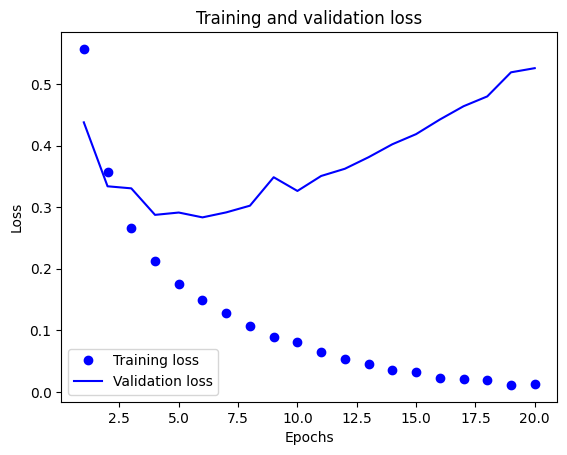

In [11]:
# Trazar la pérdida de entrenamiento y de validación

import matplotlib.pyplot as plt

loss_values = hisotry_dict['loss']
val_loss_values = hisotry_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# Teniendo en cuenta los resultados anteriores (en este caso el sobreajuste comienza sobre la etapa 4) Vamos a realizar un nuevo modelo desde cero con menos etapas

model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))


model_2.compile(optimizer='rmsprop',
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])


model_2.fit(x_Train, y_train, epochs=4, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4749 - accuracy: 0.8155
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2808 - accuracy: 0.9013
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 1s 818us/step - loss: 0.2829 - accuracy: 0.8876


Vamos a utilizar una red de entrada para generar predicciones con datos nuevos

In [14]:
model.predict(x_test)

782/782 [==============================] - 1s 734us/step


array([[0.00778061],
       [0.999998  ],
       [0.864472  ],
       ...,
       [0.00235058],
       [0.00589615],
       [0.8944779 ]], dtype=float32)